In [134]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import tree

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import calendar
from datetime import datetime

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [5]:
## Set index in datetime and set frequence in Hour
train = train.set_index('datetime', drop=False)
test = test.set_index('datetime', drop=False)
train = train.asfreq('H')
test = test.asfreq('H')

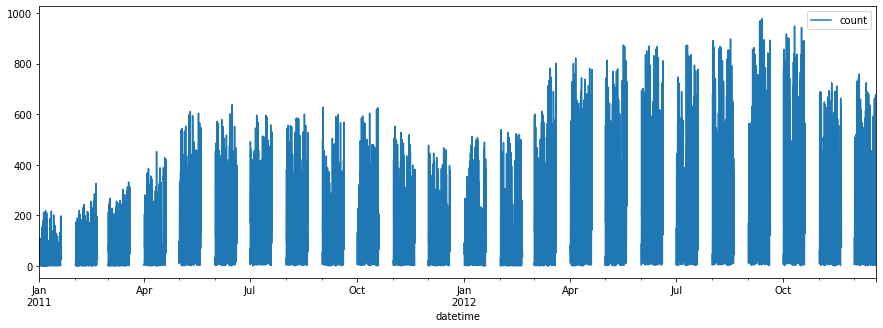

In [6]:
## See the trends of the data
train[["count"]].plot(figsize=(15,5))
plt.show()

The number of bike's usage is getting increased when the time is past.

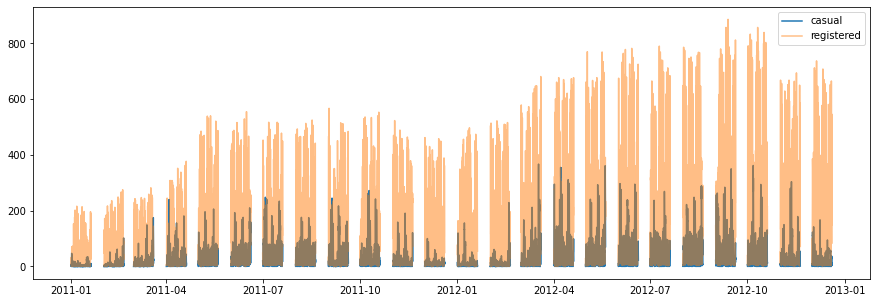

In [7]:
plt.figure(figsize=(15,5))
plt.plot(train['casual'], label = 'casual')
plt.plot(train['registered'], label = 'registered', alpha = 0.5)
plt.legend()
plt.show()

The number of using bike is getting increased.

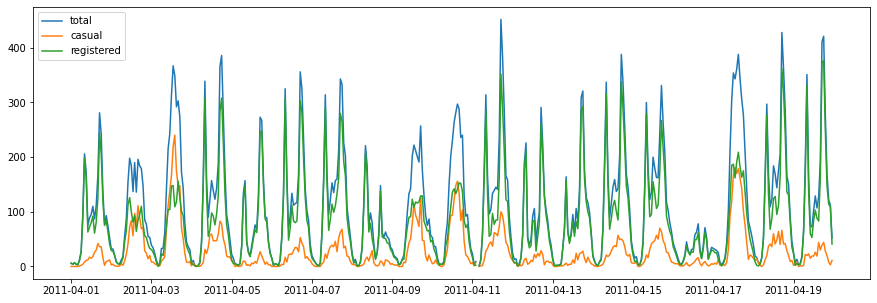

In [8]:
## Checking month trend
plt.figure(figsize=(15,5))
plt.plot(train.loc['2011-04-01':'2011-04-30', 'count'], label = 'total')
plt.plot(train.loc['2011-04-01':'2011-04-30', 'casual'], label = 'casual')
plt.plot(train.loc['2011-04-01':'2011-04-30', 'registered'], label = 'registered')
plt.legend()
plt.show()

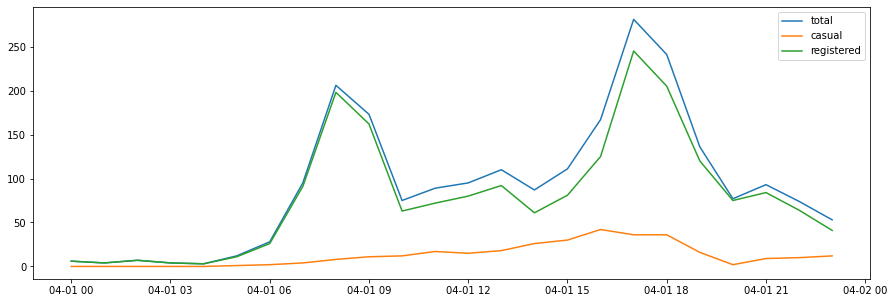

In [9]:
## Checking day trend
plt.figure(figsize=(15,5))
plt.plot(train.loc['2011-04-01', 'count'], label = 'total')
plt.plot(train.loc['2011-04-01', 'casual'], label = 'casual')
plt.plot(train.loc['2011-04-01', 'registered'], label = 'registered')
plt.legend()
plt.show()

April 1st, 2011 is on Friday.
Since it is weekday, rush hours (morning and evening) has high demand in registered compared with casual.
Based on this graph, I assumed that registered people are mostly working people.

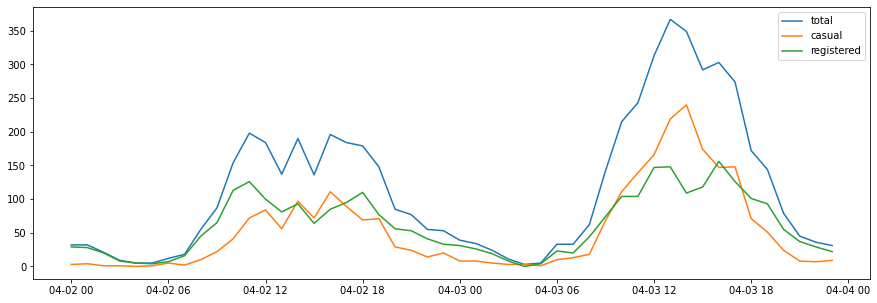

In [10]:
plt.figure(figsize=(15,5))
plt.plot(train.loc['2011-04-02':'2011-04-03', 'count'], label = 'total')
plt.plot(train.loc['2011-04-02':'2011-04-03', 'casual'], label = 'casual')
plt.plot(train.loc['2011-04-02':'2011-04-03', 'registered'], label = 'registered')
plt.legend()
plt.show()

Since April 2nd and 3rd are weekends, the number of casual is higher than the number of registered. Also, compared with graph of weekday above, there is high demand in afternoon on Sunday. Therefore, through the weekends graph, it implies that people who do not have membership of bikes come outside and rent bikes for several reasons such as going somewhere, hanging out or exercising.

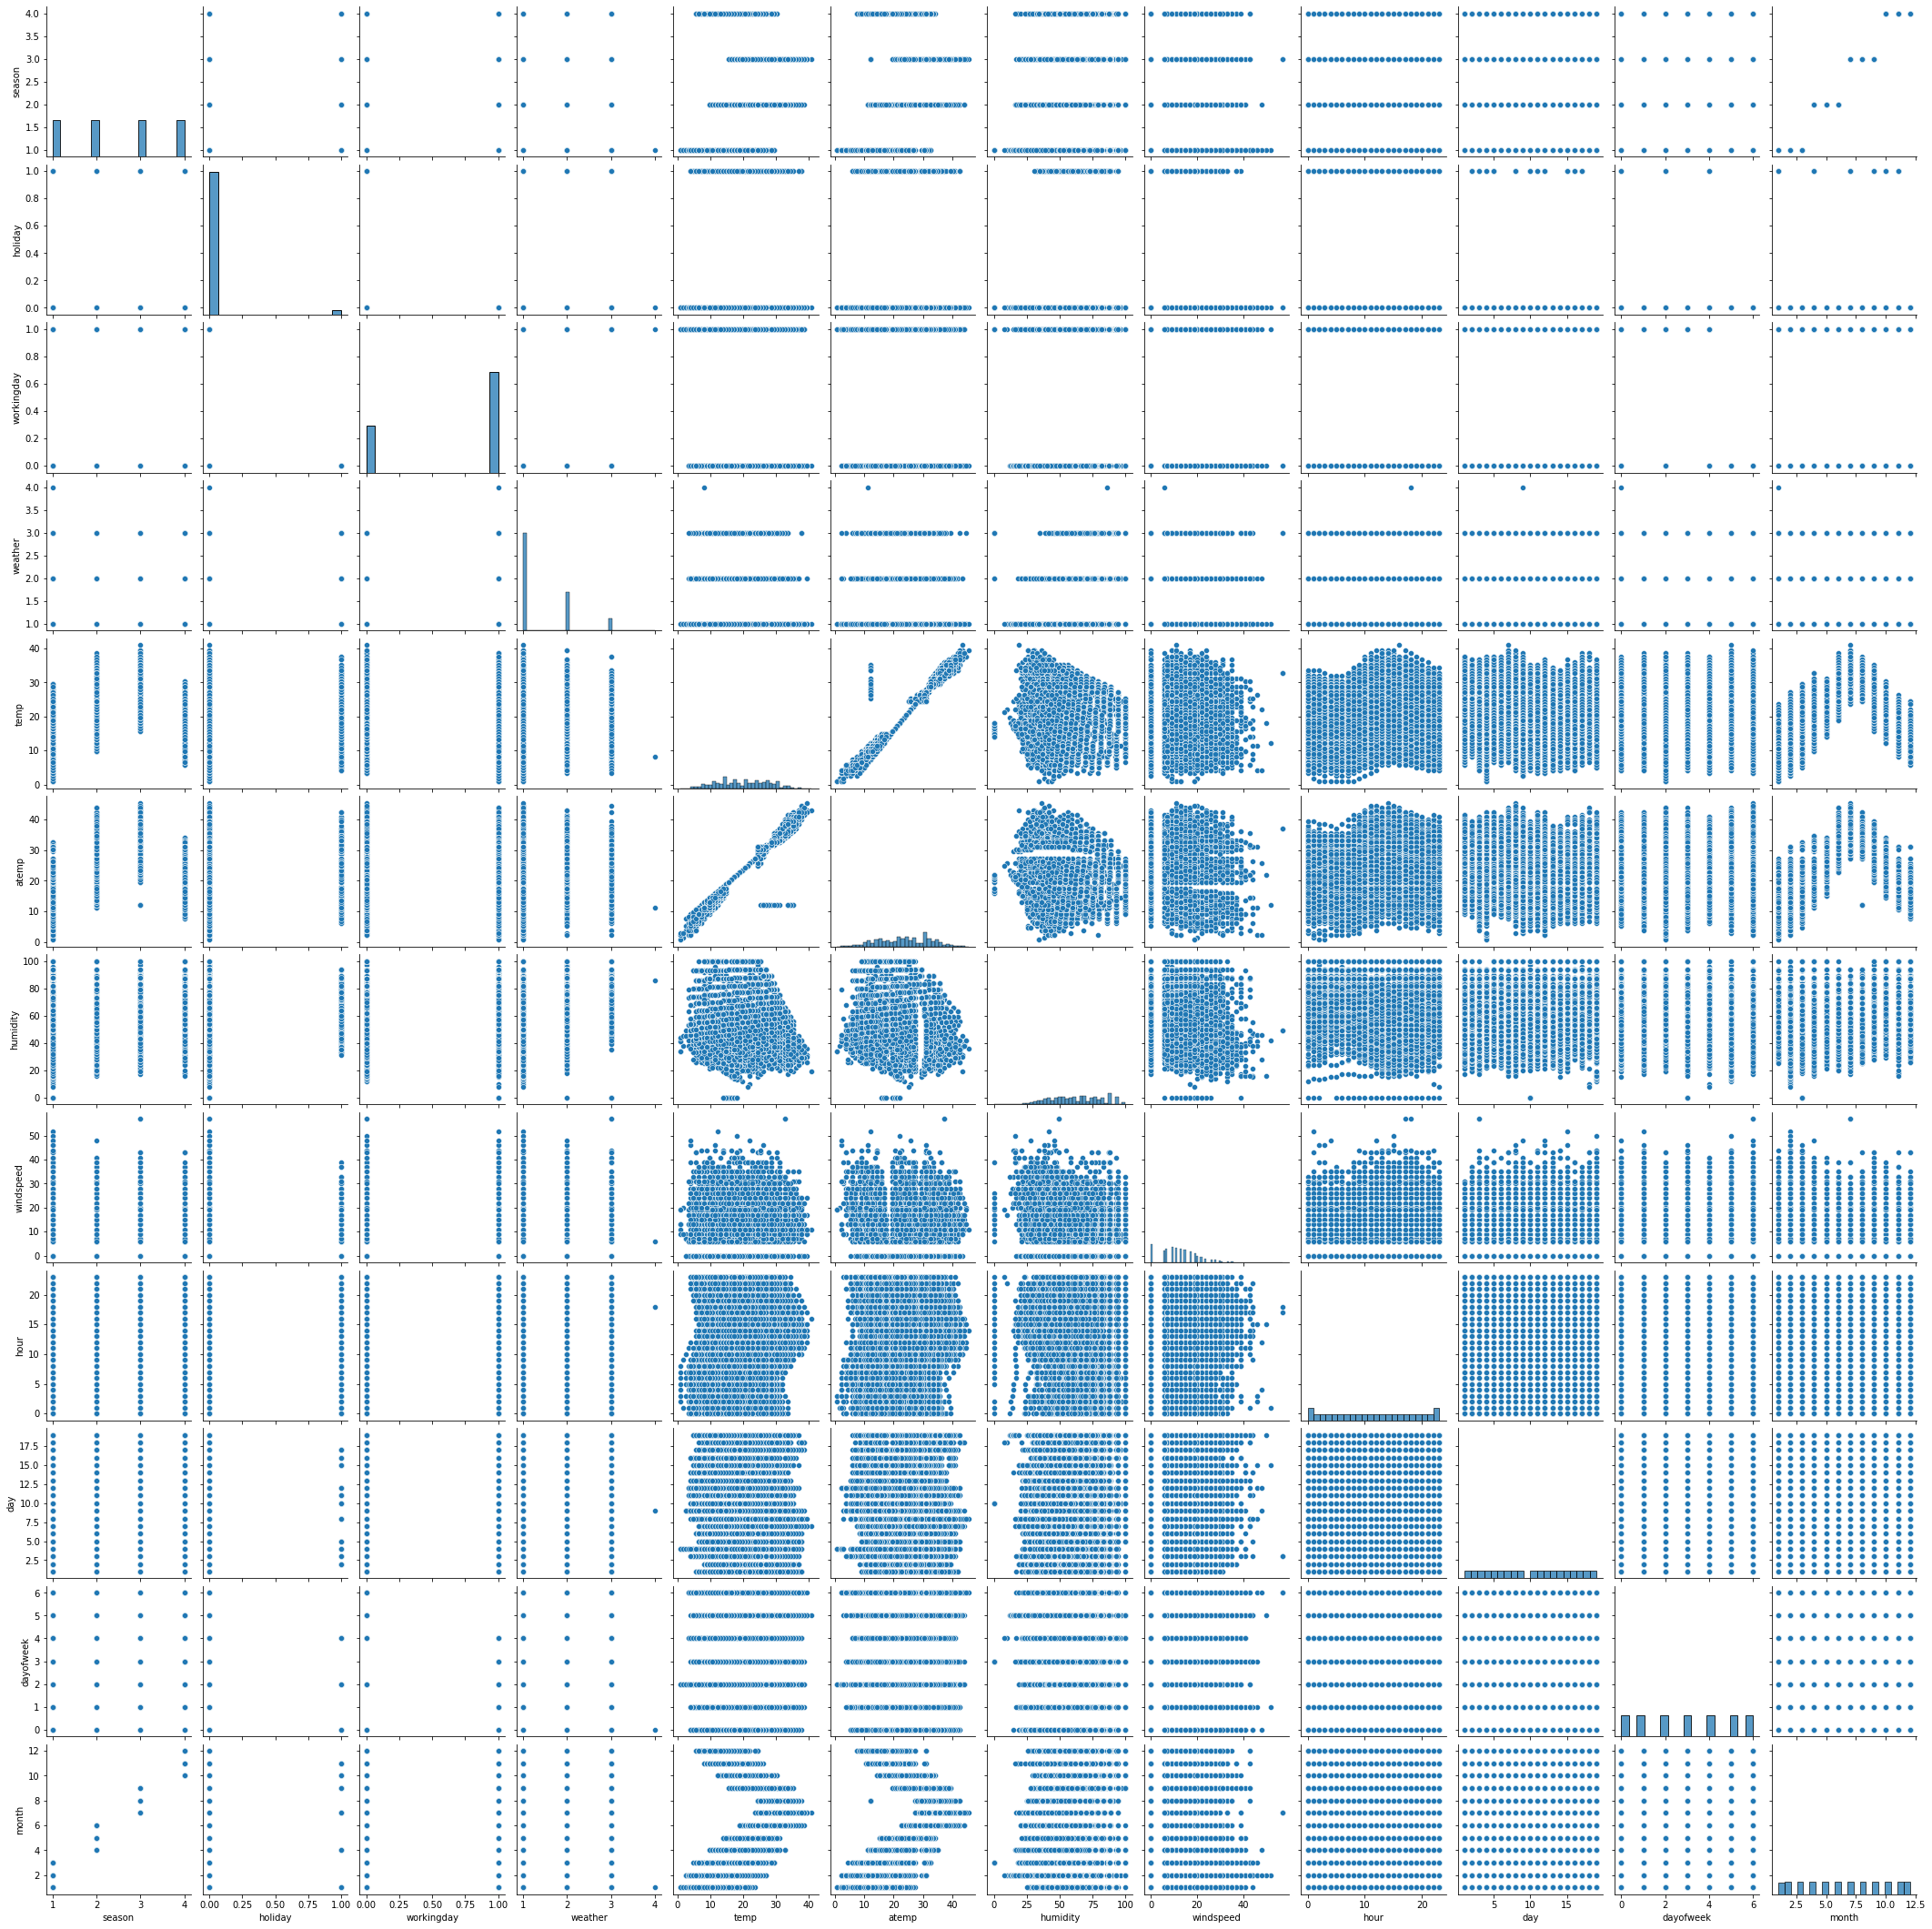

In [43]:
# The relation between each and every variable in DataFrame
sns.pairplot(train.drop(columns = ['casual', 'registered', 'count']))
plt.show()

/Users/JisunLee/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


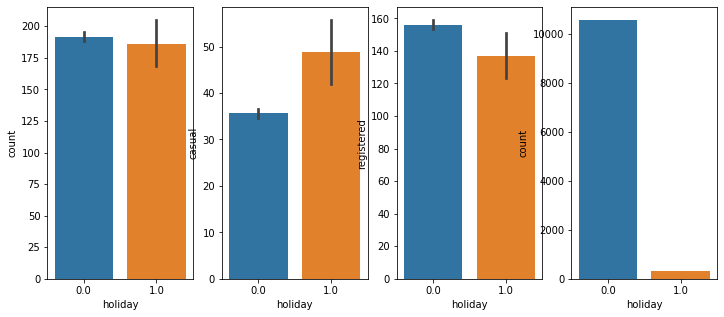

In [12]:
# ratio of holiday
fig, ax = plt.subplots(1, 4, figsize=(12,5))
sns.barplot(x='holiday', y='count', data=train, ax=ax[0])
sns.barplot(x='holiday', y='casual', data=train, ax=ax[1])
sns.barplot(x='holiday', y='registered', data=train, ax=ax[2])
sns.countplot('holiday', data=train, ax = ax[3])
plt.show()

/Users/JisunLee/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


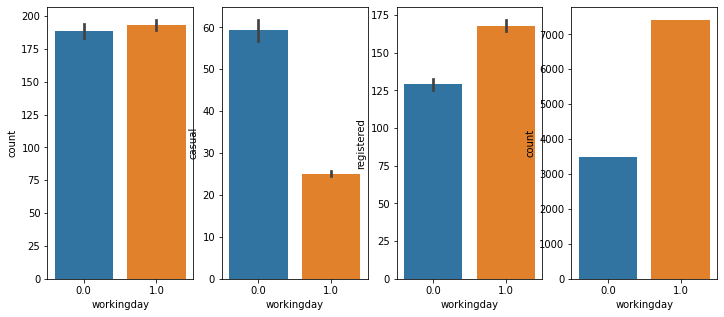

In [13]:
# ratio of workingday
fig, ax = plt.subplots(1, 4, figsize=(12,5))
sns.barplot(x='workingday', y='count', data=train, ax=ax[0])
sns.barplot(x='workingday', y='casual', data=train, ax=ax[1])
sns.barplot(x='workingday', y='registered', data=train, ax=ax[2])
sns.countplot('workingday', data=train, ax = ax[3])
plt.show()

In [48]:
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['dayofweek'] = train['datetime'].dt.dayofweek
train['month'] = train['datetime'].dt.month
train["year"] = train["datetime"].dt.year

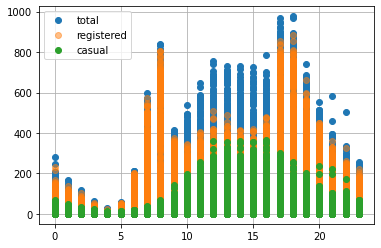

In [15]:
# Hourly Analyzing
plt.plot(train['hour'],train['count'], 'o', label = 'total')
plt.plot(train['hour'],train['registered'], 'o', label = 'registered', alpha = 0.5)
plt.plot(train['hour'],train['casual'], 'o', label = 'casual')
plt.legend()
plt.grid()
plt.show()

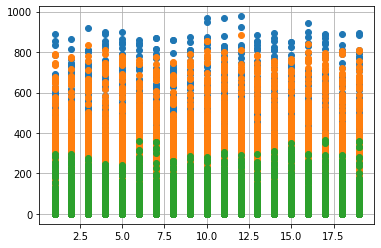

In [16]:
# daily
plt.plot(train['day'],train['count'],'o')
plt.plot(train['day'],train['registered'],'o')
plt.plot(train['day'],train['casual'],'o')
plt.grid()
plt.show()

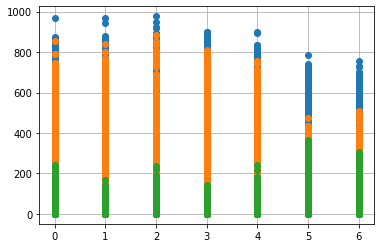

In [17]:
# weekly
plt.plot(train['dayofweek'],train['count'],'o')
plt.plot(train['dayofweek'],train['registered'],'o')
plt.plot(train['dayofweek'],train['casual'],'o')
plt.grid()
plt.show()

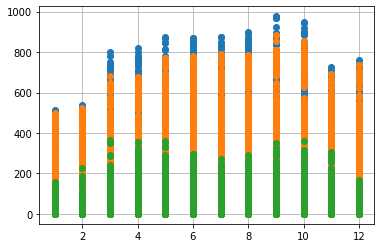

In [18]:
# Monthly
plt.plot(train['month'],train['count'],'o')
plt.plot(train['month'],train['registered'],'o')
plt.plot(train['month'],train['casual'],'o')
plt.grid()
plt.show()

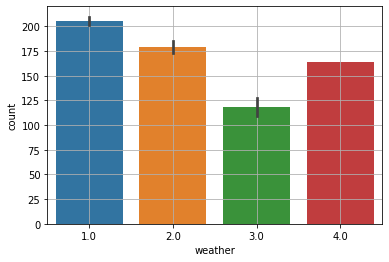

In [19]:
# Analyzing by weather
sns.barplot(data=train, x= 'weather', y='count')
plt.grid()
plt.show()

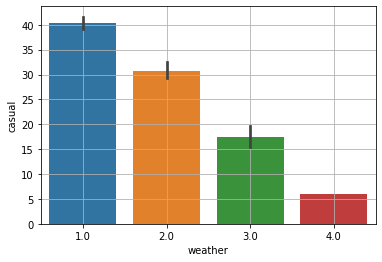

In [20]:
sns.barplot(data=train, x= 'weather', y='casual')
plt.grid()
plt.show()

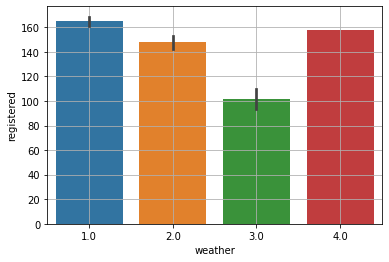

In [21]:
sns.barplot(data=train, x= 'weather', y='registered')
plt.grid()
plt.show()

After analyzing data with weather, it shows that people with casual and registered ride bikes when the weather is good(1.0); however, when the weather is bad (4.0), only registered people who regularly rides bike rent the bike.

/Users/JisunLee/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/JisunLee/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


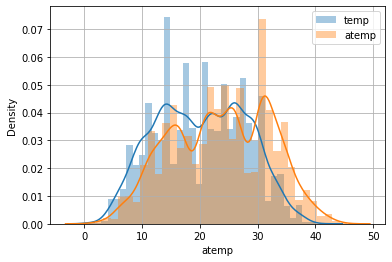

In [22]:
# temperature and feels like temperature
sns.distplot(train['temp'], label='temp')
sns.distplot(train['atemp'], label='atemp')
plt.legend()
plt.grid()
plt.show()

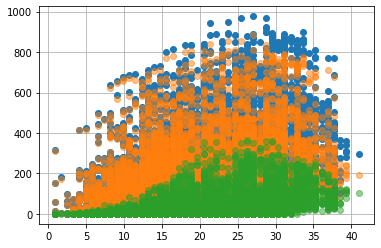

In [23]:
plt.plot(train['temp'],train['count'],'o',label='count')
plt.plot(train['temp'],train['registered'],'o',label='registered',alpha=0.5)
plt.plot(train['temp'],train['casual'],'o',label='casual',alpha=0.5)
plt.grid()
plt.show()

Analyzing data with temperature, casual and registered people like to ride the bikes when the temperature is moderately warm weather. Although the number of count is high in moderately warm like between 20 to 30, the increment of graph is not extremely high.

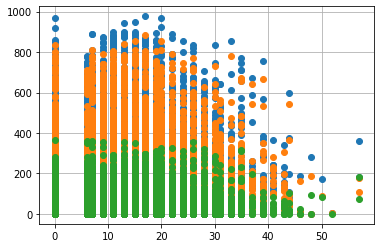

In [24]:
# Analyzing by windspeed
plt.plot(train['windspeed'],train['count'],'o')
plt.plot(train['windspeed'],train['registered'],'o')
plt.plot(train['windspeed'],train['casual'],'o')
plt.grid()
plt.show()

As the result of the windspeed graph, it gradually decrease when the wind speed is getting high. Since there is a high number of zero, I can assume that when they set a zero for unobserved or in this city, it is not a city of wind.

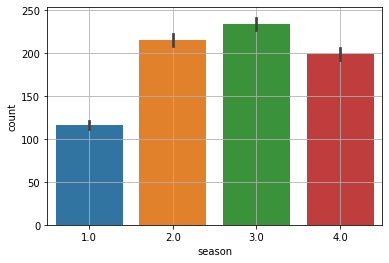

In [34]:
# Analyzing by season
sns.barplot(data=train, x='season', y='count')
plt.grid()
plt.show()

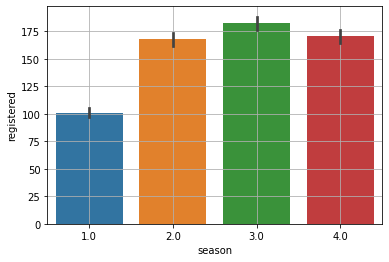

In [35]:
sns.barplot(data=train, x='season', y='registered')
plt.grid()
plt.show()

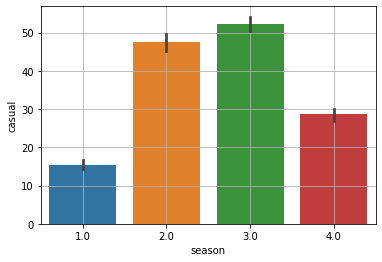

In [36]:
sns.barplot(data=train, x='season', y='casual')
plt.grid()
plt.show()

Through drawing the graphs of season, the trends of casual and registerend show similar shape. However, it is surprising that the number of usage bicycles in Spring is the smallest. I thought people want to use bicycles when it is not cold, but it was not.

In [39]:
corrTrain = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrTrain = corrTrain.corr()
print(corrTrain)

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


<AxesSubplot:>

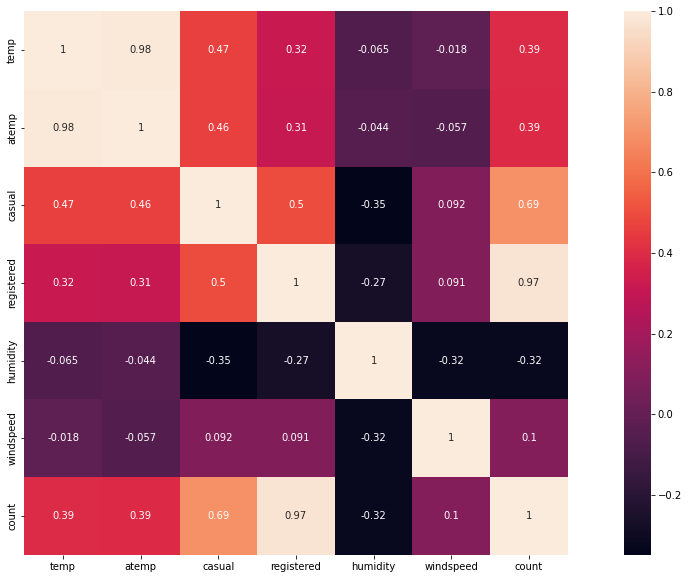

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrTrain, square=True, annot=True)

Temp, humidity and windspeed do not correlated. Count and registered are highly correlated. However, in the test data, registered, casual and count variables do not exist.The relationship between atemp and temp shows the highest relationship, but they are not good for feature because it is obvious that the temperature is effective to feeling temperature.

In [83]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [84]:
test = pd.read_csv("test.csv", parse_dates=["datetime"])
test.shape

(6493, 9)

In [87]:
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['dayofweek'] = train['datetime'].dt.dayofweek
train['month'] = train['datetime'].dt.month
train["year"] = train["datetime"].dt.year

In [88]:
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['dayofweek'] = test['datetime'].dt.dayofweek
test['month'] = test['datetime'].dt.month
test["year"] = test["datetime"].dt.year

In [90]:
categorical_feature = ["season","holiday","workingday","weather","dayofweek","month","year","hour"]
for var in categorical_feature:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [91]:
feature = ["season", "weather", "temp", "atemp", "humidity","year", "hour", "dayofweek", "holiday", "workingday"]
feature

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [92]:
# Pick useful variables
xTrain = train[feature]
print(xTrain.shape)
xTrain.head()

(10886, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,2011,0,5,0,0
1,1,1,9.02,13.635,80,2011,1,5,0,0
2,1,1,9.02,13.635,80,2011,2,5,0,0
3,1,1,9.84,14.395,75,2011,3,5,0,0
4,1,1,9.84,14.395,75,2011,4,5,0,0


In [95]:
xTest = test[feature]

print(xTest.shape)
xTest.head()

(6493, 10)


,season,weather,temp,atemp,humidity,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,2011,0,3,0,1
1,1,1,10.66,13.635,56,2011,1,3,0,1
2,1,1,10.66,13.635,56,2011,2,3,0,1
3,1,1,10.66,12.880,56,2011,3,3,0,1
4,1,1,10.66,12.880,56,2011,4,3,0,1


In [96]:
yTrain = train["count"]
print(yTrain.shape)
yTrain.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [104]:
def rmsle(predict, actual, convertExp=True):
    if convertExp:
        predict = np.exp(predict)
        actual = np.exp(actual)
        
    predict = np.array(predict)
    actual = np.array(actual)
    
    # Change values into log to make normal distribution
    # Add 1 for when log is applied for preventing 0 or infinite values 
    log_predict = np.log(predict + 1)
    log_actural = np.log(actual + 1)
    
    difference = np.square(log_predict - log_actural)
    mean_diff = difference.mean()
    value = np.sqrt(mean_diff)
    
    return value

In [105]:
# Predict with Linear Regression
LinearModel = LinearRegression()

yTrain_log = np.log1p(yTrain)
model = LinearModel.fit(xTrain, yTrain_log)
yPredict = model.predict(xTrain)
print ("RMSLE Value For Linear Regression: ", rmsle(np.exp(yTrain_log),np.exp(yPredict), False))


RMSLE Value For Linear Regression:  0.9803697923313504


/Users/JisunLee/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/JisunLee/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

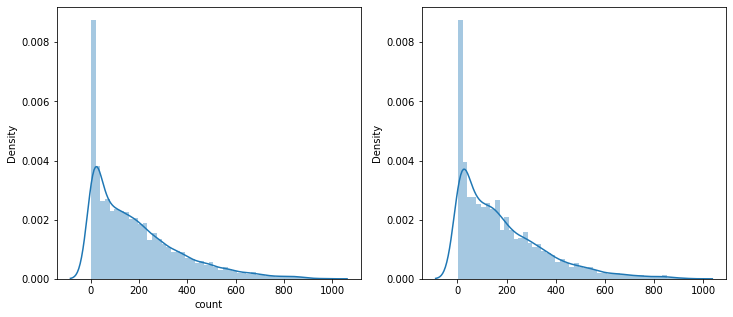

In [151]:
predTest = model.predict(xTest)
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(yTrain, ax=ax1, bins=50)
sns.distplot(np.exp(predsTest), ax=ax2, bins=50)

In [149]:
# RandomForest
rfModel = RandomForestRegressor(n_estimators=100)

yTrain_log = np.log1p(yTrain)
rfModel.fit(xTrain, yTrain_log)

yPredict = rfModel.predict(xTrain)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yTrain_log),np.exp(yPredict),False))

RMSLE Value For Random Forest:  0.10667871143814546


/Users/JisunLee/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/JisunLee/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

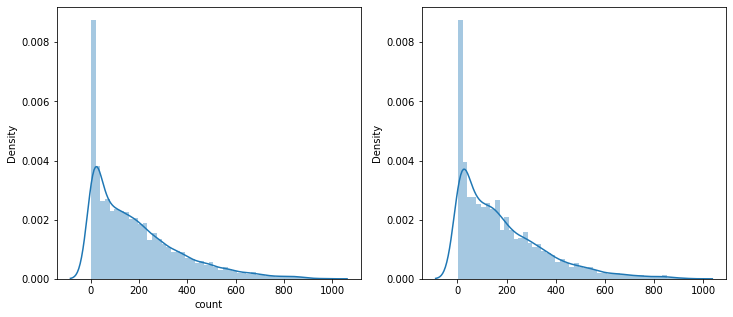

In [150]:
predsTest = rfModel.predict(xTest)
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(yTrain, ax=ax1, bins=50)
sns.distplot(np.exp(predsTest), ax=ax2, bins=50)